# Chapter 13

## Imports

In [1]:
import numpy as np
import tensorflow as tf
import image_params
from matplotlib import pyplot as plt

## Definitions

In [2]:

image_params.set_imageFontSize()

## Fig 2

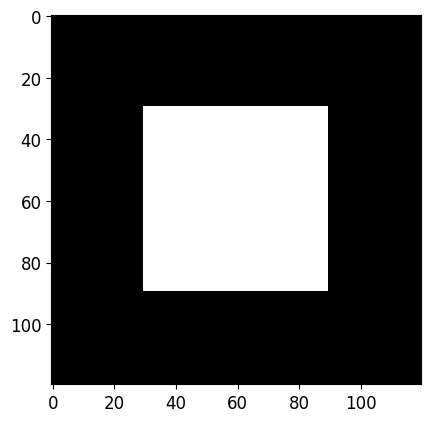

In [3]:
square_img = np.zeros((120, 120))
square_img[30:90, 30:90] = 1
plt.imshow(square_img, cmap= "gray")

## Fig 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


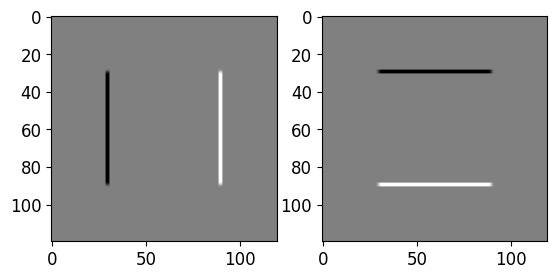

In [4]:
img = np.expand_dims(square_img, 0)

sobel_x=np.array([[1, 0, -1],
                 [2, 0, -2],
                 [1, 0, -1]],dtype='float32')

sobel_y = sobel_x.T

filters=np.zeros([3,3,1,2])

filters[:,:,0,0]=sobel_x
filters[:,:,0,1]=sobel_y

init_kernel = tf.keras.initializers.constant(filters)

init_bias = np.zeros((2,))
init_bias = tf.keras.initializers.constant(init_bias)

conv_layer = tf.keras.layers.Conv2D(2, 
                                    kernel_size=(3, 3), 
                                    activation=None,
                                    kernel_initializer=init_kernel,
                                    bias_initializer=init_bias,
                                    padding='same',
                                    strides=[1, 1],
                                    name = "conv2d")

input_shape = (120, 120, 1)
model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        conv_layer,
        ])

activations = model.predict(img) 
layer = model.get_layer(name="conv2d")
weights, biases = layer.get_weights()

fig, (sobel_ax1, sobel_ax2) = plt.subplots(1, 2)
ax=sobel_ax1.imshow(activations[0, :, :, 0], cmap = 'gray')
ax=sobel_ax2.imshow(activations[0, :, :, 1], cmap = 'gray')

## Fig 4

In [5]:
(train_images, train_labels), (test_images, test_labels)  = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0
input_shape = (28,28,1)

model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name = "mnist_conv1"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", name = "mnist_conv2"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32),
        tf.keras.layers.Dense(10),
        ])

model.compile(optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ["accuracy"])
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs = 3, verbose = 1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9583 - loss: 0.1381 - val_accuracy: 0.9846 - val_loss: 0.0496
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9850 - loss: 0.0490 - val_accuracy: 0.9870 - val_loss: 0.0417
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9891 - val_loss: 0.0325


### Fig 4a

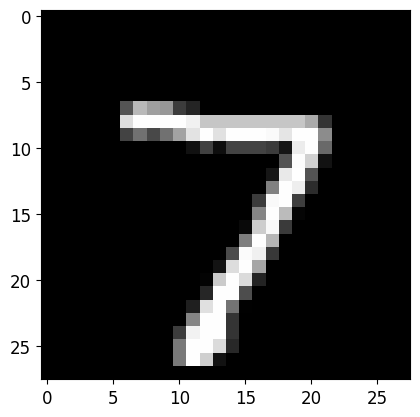

In [6]:
test_ind=0
im = test_images[test_ind]

plt.figure()
plt.imshow(im, cmap = "gray")

### Fig 4b

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


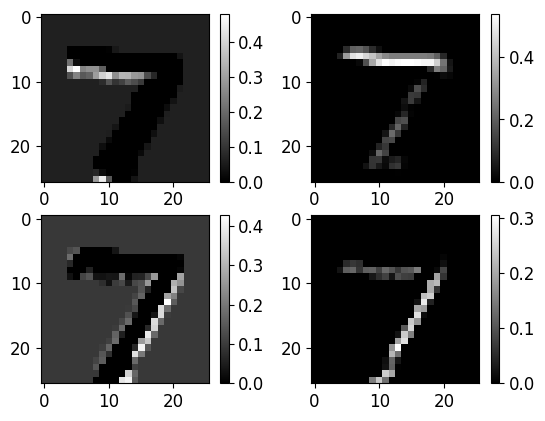

In [7]:
# Make sure images have shape (28, 28, 1)
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

img = np.expand_dims(im, 0)
layer = model.get_layer(name="mnist_conv1")
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=layer.output)
activations = feature_extractor.predict(img) 

fig, ((act_ax1, act_ax2), (act_ax3, act_ax4)) = plt.subplots(2, 2)
act1 = act_ax1.imshow(activations[0, :, :, 0], cmap = "gray")
fig.colorbar(act1, ax=act_ax1, location='right', anchor=(0, 0.3))
act2 = act_ax2.imshow(activations[0, :, :, 1], cmap = "gray")
fig.colorbar(act2, ax=act_ax2, location='right', anchor=(0, 0.3))
act3 = act_ax3.imshow(activations[0, :, :, 2], cmap = "gray")
fig.colorbar(act3, ax=act_ax3, location='right', anchor=(0, 0.3))
act4 = act_ax4.imshow(activations[0, :, :, 3], cmap = "gray")
fig.colorbar(act4, ax=act_ax4, location='right')